In [ ]:
# !pip install kaggle

[Kaggle code](https://www.kaggle.com/aronpollner/38-categories)

# [models](https://towardsdatascience.com/transfer-learning-with-convolutional-neural-networks-in-pytorch-dd09190245ce)

# **Plant Diseases**

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
import os
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
import cv2 as cv2
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,BatchNormalization, GlobalAveragePooling2D
import tensorflow as tf

In [ ]:
import os
# os.environ['KAGGLE_CONFIG_DIR']='/content'a

In [ ]:
# !kaggle datasets download -d vipoooool/new-plant-diseases-dataset

In [ ]:
# !unzip new-plant-diseases-dataset.zip

In [ ]:
train_path= '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
valid_path= '/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

In [ ]:
dirls = os.listdir(train_path)
print(dirls)
val = train_path + '/'+dirls[0]
print(val)

['Tomato___Tomato_mosaic_virus', 'Corn_(maize)___healthy', 'Potato___healthy', 'Grape___healthy', 'Tomato___Leaf_Mold', 'Tomato___healthy', 'Corn_(maize)___Common_rust_', 'Tomato___Late_blight', 'Soybean___healthy', 'Apple___Black_rot', 'Potato___Early_blight', 'Tomato___Early_blight', 'Grape___Esca_(Black_Measles)', 'Tomato___Target_Spot', 'Apple___healthy', 'Apple___Apple_scab', 'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Peach___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Pepper,_bell___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Raspberry___healthy', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Apple___Cedar_apple_rust', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Squash___Powdery_mildew', 'Pepper,_bell___Bacterial_spot', 'Tomato___Septoria_leaf_spot', 'Tomato___Bacterial_spot', 'Peach___Bacterial_spot', 'Cherry_(including_sour)___healthy', 'Strawberry___healthy', 'Potato___Late_blight', 'Grape___Bla

In [ ]:
def loading_images(path):
    pathnames = []
    dir_list = os.listdir(path)
    unique_classes = sorted(dir_list)
    for i in range(len(unique_classes)):
        newpath = train_path + "/"+ unique_classes[i]
        pathnames.append(newpath)
    return(pathnames, unique_classes) 

In [ ]:
def valid_loading_images(path):
    pathnames = []
    dir_list = os.listdir(path)
    unique_classes = sorted(dir_list)
    for i in range(len(unique_classes)):
        newpath = valid_path + "/"+ unique_classes[i]
        pathnames.append(newpath)
    return(pathnames, unique_classes) 

In [ ]:
paths, classes = loading_images(train_path)
valid_paths,valid_classes=valid_loading_images(valid_path)

In [ ]:
def labeling_images(unique_paths, unique_classes):
    img_paths =[]
    labels = []
    for path, label in zip(unique_paths, unique_classes):
        dir_list = os.listdir(path)
        for i in dir_list:
            img_dir_list = path + "/" + i
            img_paths.append(img_dir_list)
            labels.append(label)
    return(img_paths, labels)
    

In [ ]:
img_paths , labels = labeling_images(paths, classes)
valid_img_paths,valid_lables=labeling_images(valid_paths, valid_classes)

In [ ]:
print(img_paths.__len__())
print(labels.__len__())

70295
70295


In [ ]:
print(valid_img_paths.__len__())
print(valid_lables.__len__())

17572
17572


<class 'numpy.ndarray'>


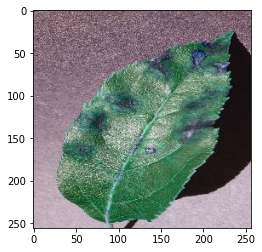

In [ ]:
img = cv2.imread(img_paths[0])
print(type(img))
plt.imshow(img)

In [ ]:
train_dataset = list(zip(img_paths, labels))
valid_dataset= list(zip(valid_img_paths, valid_lables))

In [ ]:
train_dataset_df = pd.DataFrame(train_dataset, columns = ['Image_Paths', 'Labels'])
valid_dataset_df = pd.DataFrame(valid_dataset, columns = ['Image_Paths', 'Labels'])

In [ ]:
train_dataset_df.head()

,Image_Paths,Labels
0,/content/New Plant Diseases Dataset(Augmented)...,Apple___Apple_scab
1,/content/New Plant Diseases Dataset(Augmented)...,Apple___Apple_scab
2,/content/New Plant Diseases Dataset(Augmented)...,Apple___Apple_scab
3,/content/New Plant Diseases Dataset(Augmented)...,Apple___Apple_scab
4,/content/New Plant Diseases Dataset(Augmented)...,Apple___Apple_scab


In [ ]:
valid_dataset_df.head()

,Image_Paths,Labels
0,/content/New Plant Diseases Dataset(Augmented)...,Apple___Apple_scab
1,/content/New Plant Diseases Dataset(Augmented)...,Apple___Apple_scab
2,/content/New Plant Diseases Dataset(Augmented)...,Apple___Apple_scab
3,/content/New Plant Diseases Dataset(Augmented)...,Apple___Apple_scab
4,/content/New Plant Diseases Dataset(Augmented)...,Apple___Apple_scab


In [ ]:
print(valid_dataset_df.shape,train_dataset_df.shape)

(17572, 2) (70295, 2)


In [ ]:
train_datagen = ImageDataGenerator(rescale = 1.0/255)

In [ ]:
train_gen = train_datagen.flow_from_dataframe(dataframe = train_dataset_df, x_col='Image_Paths', y_col='Labels', batch_size=16, 
                                               target_size = (224, 224),class_mode = 'categorical', shuffle=True)

Found 70295 validated image filenames belonging to 38 classes.


In [ ]:
valid_gen = train_datagen.flow_from_dataframe(dataframe = valid_dataset_df, x_col='Image_Paths', y_col='Labels', batch_size=16, target_size = (224, 224),
                                              class_mode = 'categorical', shuffle=True)

Found 17572 validated image filenames belonging to 38 classes.


In [ ]:
vvhxgvhxbhdgvydsucbudsygv

NameError: ignored

# **vgg16 model (224,224,3)**

In [ ]:
base_model = tf.keras.applications.VGG16(weights='imagenet', input_shape=(224,224,3), include_top =False)

In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
network =Sequential()
network.add(base_model)

network.add(Flatten())
network.add(Dense(38, activation='softmax'))


In [ ]:
base_model.summary()

In [ ]:
network.summary()

In [ ]:
network.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
network.fit(
  train_gen,
  validation_data=valid_gen,
  epochs=3,verbose=1
)

In [ ]:
network.save('vgg16_model.h5')

# **vgg19 model (224,224,3)**

In [ ]:
from keras.applications.vgg19 import VGG19
base_model = tf.keras.applications.VGG19(weights='imagenet', input_shape=(224,224,3), include_top =False)

In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
network =Sequential()
network.add(base_model)

network.add(Flatten())
network.add(Dense(38, activation='softmax'))

In [ ]:
base_model.summary()

In [ ]:
network.summary()

In [ ]:
network.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
network.fit(
  train_gen,
  validation_data=valid_gen,
  epochs=3,verbose=1
)

In [ ]:
network.save('vgg19_model.h5')

# **InceptionV3 model (299,299,3)**
## - **48 deep layers (takes a lot time)**
- [Inception model](https://towardsdatascience.com/deep-learning-understand-the-inception-module-56146866e652)
- [5 models](https://www.pyimagesearch.com/2017/03/20/imagenet-vggnet-resnet-inception-xception-keras/)

In [ ]:
train_gen = train_datagen.flow_from_dataframe(dataframe = train_dataset_df, x_col='Image_Paths', y_col='Labels', batch_size=16, 
                                               target_size = (150,150),class_mode = 'categorical', shuffle=True)

In [ ]:
from keras.applications.inception_v3 import InceptionV3
base_model = tf.keras.applications.InceptionV3(weights='imagenet', input_shape=(150,150,3), include_top =False)

In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
valid_gen = train_datagen.flow_from_dataframe(dataframe = valid_dataset_df, x_col='Image_Paths', y_col='Labels', batch_size=16, target_size = (150,150),
                                              class_mode = 'categorical', shuffle=True)

In [ ]:
network =Sequential()
network.add(base_model)

network.add(Flatten())
network.add(Dense(38, activation='softmax'))

In [ ]:
base_model.summary()

In [ ]:
network.summary()

In [ ]:
network.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
network.fit(
  train_gen,
  validation_data=valid_gen,
  epochs=3,verbose=1
)

In [ ]:
network.save('inception_V3_model.h5')

# **InceptionResNetV2**

# **MobileNetV2**
[Model Link](https://www.tensorflow.org/api_docs/python/tf/keras/applications/mobilenet_v2/MobileNetV2)

# **END------------------------------------**